#### import

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

#### 학습결과 시각화 함수

In [2]:
# epoch별 loss의 변화를 시각화하는 함수
def plot_loss(epochs, history):
    """
    학습 loss를 시각화 하는 함수
    """
    plt.figure(figsize=(8,7))
    plt.plot(range(1, epochs+1), history.history['loss'], label='Train Loss')
    plt.plot(range(1, epochs+1), history.history['val_loss'], label='Validation Loss')
    plt.title("Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()    

In [3]:
# epoch별 accuracy의 변화를 시각화하는 함수
def plot_accuracy(epochs, history):
    """
    학습 Accuracy를 시각화 하는 함수
    """
    plt.figure(figsize=(8,7))
    plt.plot(range(1, epochs+1), history.history['accuracy'], label='Train Accuracy')
    plt.plot(range(1, epochs+1), history.history['val_accuracy'], 
                                                 label='Validation Accuracy')
    plt.title("Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()  

#### 데이터 로딩
- MNIST 숫자 손글씨 데이터

In [4]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

In [5]:
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

#### 하이퍼파라미터 변수 정의

In [6]:
# 하이퍼파라미터 변수
LEARNING_RATE = 0.001  #학습율 - optimizer에 설정
N_EPOCHS = 20   # 에폭수
N_BATCHS = 100  # batch size

# train/test 데이터의 개수를 변수 정의
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]

#### 전처리
- image : 0 ~ 1 사이의 값으로 정규화
- label : one hot encoding (다중분류문제이므로)

In [7]:
train_image.dtype

dtype('uint8')

In [8]:
X_train = (train_image).astype("float32")/255.0
X_test = (test_image).astype('float32')/255.0

In [9]:
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [10]:
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)

(0.0, 1.0, 0.0, 1.0)

In [11]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

#### Dataset 생성

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

# 모델의 크기 변경

#### 작은 모델

In [15]:
def create_small_model():
    #모델생성
    model = keras.Sequential()
    # 레이어 추가 - Hidden
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=1, activation='relu'))
    # 출력레이어 - 다중분류: unit수-클래스수, activation-softmax
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [16]:
# 모델 생성, 컴파일
small_model =  create_small_model()
# 다중분류: loss-categorical_crossentropy
small_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [17]:
small_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1)                 785       
                                                                 
 dense_1 (Dense)             (None, 10)                20        
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


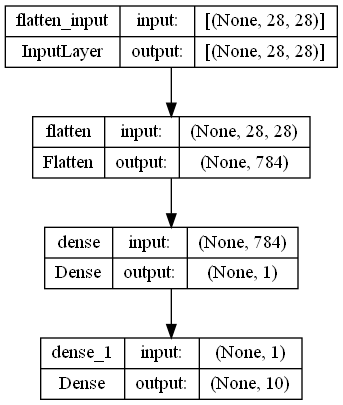

In [18]:
keras.utils.plot_model(small_model, show_shapes=True)

In [19]:
hist = small_model.fit(train_dataset, epochs=N_EPOCHS, 
                       validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 5s 7ms/step - loss: 2.0981 - accuracy: 0.1922 - val_loss: 1.9758 - val_accuracy: 0.2240
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 1.9096 - accuracy: 0.2301 - val_loss: 1.8601 - val_accuracy: 0.2478
Epoch 3/20
600/600 [==============================] - 4s 6ms/step - loss: 1.8248 - accuracy: 0.2455 - val_loss: 1.7992 - val_accuracy: 0.2550
Epoch 4/20
600/600 [==============================] - 4s 6ms/step - loss: 1.7779 - accuracy: 0.2595 - val_loss: 1.7630 - val_accuracy: 0.2738
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 1.7476 - accuracy: 0.2717 - val_loss: 1.7367 - val_accuracy: 0.2688
Epoch 6/20
600/600 [==============================] - 4s 6ms/step - loss: 1.7259 - accuracy: 0.2754 - val_loss: 1.7191 - val_accuracy: 0.2709
Epoch 7/20
600/600 [==============================] - 4s 6ms/step - loss: 1.7098 - accuracy: 0.2796 - val_loss: 1.7028 - val_accuracy: 0.2833
Epoch 

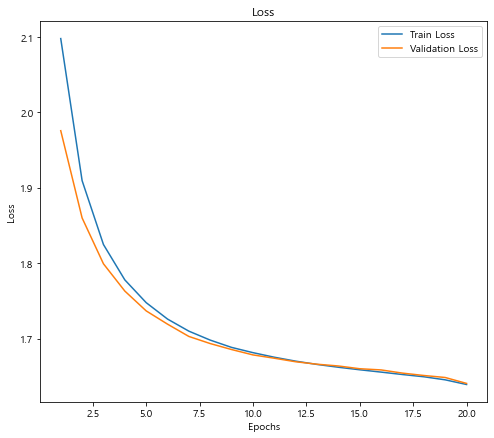

In [20]:
plot_loss(N_EPOCHS, hist)

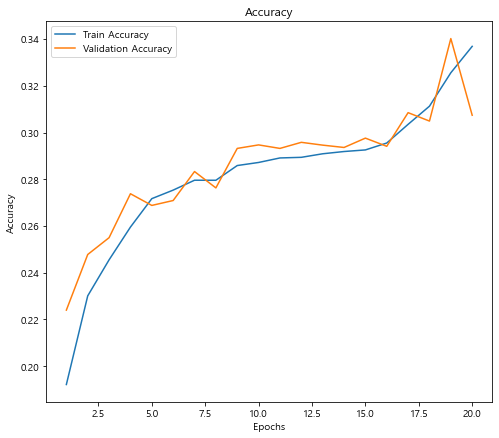

In [21]:
plot_accuracy(N_EPOCHS, hist)

#### 모델의 크기를 크게

In [22]:
def create_bigger_model():
    model = keras.Sequential()
    #은닉층
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    #출력층
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [23]:
bigger_model = create_bigger_model()
bigger_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [24]:
bigger_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 317,450
Trainable params: 317,450
Non-tr

In [25]:
hist = bigger_model.fit(train_dataset, 
                        epochs=N_EPOCHS, 
                        validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 9s 14ms/step - loss: 0.2487 - accuracy: 0.9250 - val_loss: 0.1196 - val_accuracy: 0.9619
Epoch 2/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0944 - accuracy: 0.9709 - val_loss: 0.0859 - val_accuracy: 0.9739
Epoch 3/20
600/600 [==============================] - 9s 14ms/step - loss: 0.0631 - accuracy: 0.9804 - val_loss: 0.0871 - val_accuracy: 0.9737
Epoch 4/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0497 - accuracy: 0.9840 - val_loss: 0.0778 - val_accuracy: 0.9784
Epoch 5/20
600/600 [==============================] - 7s 12ms/step - loss: 0.0410 - accuracy: 0.9866 - val_loss: 0.0814 - val_accuracy: 0.9768
Epoch 6/20
600/600 [==============================] - 8s 12ms/step - loss: 0.0325 - accuracy: 0.9891 - val_loss: 0.0873 - val_accuracy: 0.9754
Epoch 7/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0287 - accuracy: 0.9906 - val_loss: 0.0783 - val_accuracy: 0.9772

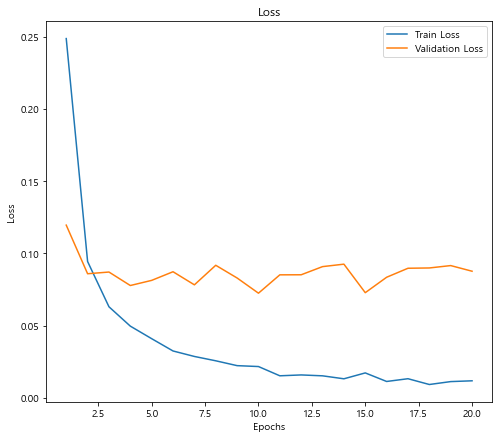

In [26]:
plot_loss(N_EPOCHS, hist)

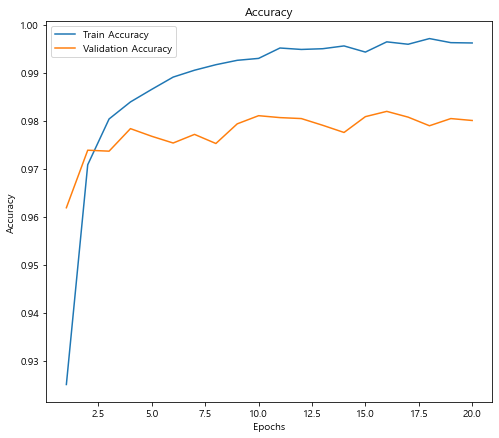

In [27]:
plot_accuracy(N_EPOCHS, hist)

## Dropout 적용
- layers.Dropout 객체를 이용
- dropout rate는 0.2 ~ 0.5 정도로 설정
    - 규제 강도는 rate를 크게 잡을 수록 커진다.
- dropout node를 가질 Layer 앞에 추가.

In [36]:
def create_dropout_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=128, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=128, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=10, activation='softmax', name='output'))
    return model

In [37]:
dropout_model = create_dropout_model()
dropout_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

In [38]:
dropout_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dropout_5 (Dropout)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [31]:
# Dropout Layer를 추가한 경우에는 epoch를 더 늘려준다.
hist = dropout_model.fit(train_dataset, 
                         epochs=N_EPOCHS+10, 
                         validation_data=test_dataset)

Epoch 1/30
600/600 [==============================] - 11s 17ms/step - loss: 0.8477 - accuracy: 0.7170 - val_loss: 0.2501 - val_accuracy: 0.9280
Epoch 2/30
600/600 [==============================] - 11s 18ms/step - loss: 0.4386 - accuracy: 0.8701 - val_loss: 0.1758 - val_accuracy: 0.9504
Epoch 3/30
600/600 [==============================] - 11s 18ms/step - loss: 0.3603 - accuracy: 0.8948 - val_loss: 0.1464 - val_accuracy: 0.9590
Epoch 4/30
600/600 [==============================] - 11s 18ms/step - loss: 0.3258 - accuracy: 0.9057 - val_loss: 0.1285 - val_accuracy: 0.9626
Epoch 5/30
600/600 [==============================] - 11s 18ms/step - loss: 0.3002 - accuracy: 0.9138 - val_loss: 0.1223 - val_accuracy: 0.9628
Epoch 6/30
600/600 [==============================] - 10s 17ms/step - loss: 0.2805 - accuracy: 0.9186 - val_loss: 0.1088 - val_accuracy: 0.9668
Epoch 7/30
600/600 [==============================] - 8s 13ms/step - loss: 0.2673 - accuracy: 0.9236 - val_loss: 0.1082 - val_accuracy: 

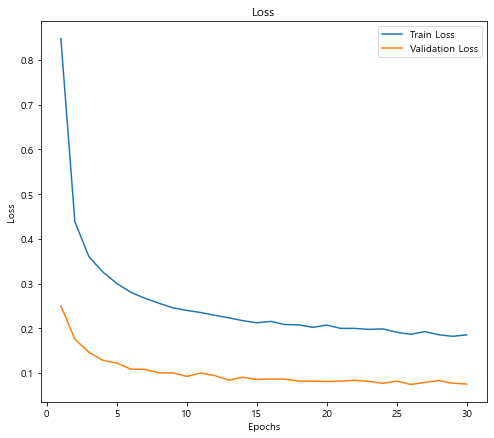

In [33]:
plot_loss(N_EPOCHS+10, hist)

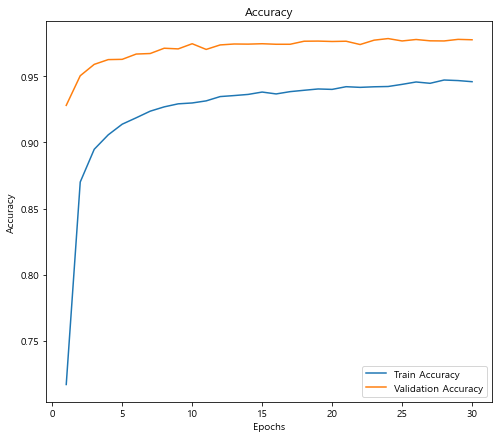

In [34]:
plot_accuracy(N_EPOCHS+10, hist)

## Batch Normalization
- Dense -> BN -> Activation  순서로 적용
> Dense Layer: 가중합 처리 (X@W + B)
> Dense(units=36) => 36개의 unit을 가지는 Dense Layer를 생성. 각 unit은 가중합 처리
> Dense(units=36, activation='relu')  => 36개의 unit들이 가중합 처리하고 그 결과를 activation(relu) layer에 전달해서 처리. => Dense layer + Activation layer
- layers.BatchNormalization 사용

In [ ]:
layers.Softmax() # softmax
layers.Activation('sigmoid') # logistic(sigmoid)

In [24]:
def create_bn_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    
    model.add(layers.Dense(units=256, name="my_dense")) # 가중합계산
    model.add(layers.BatchNormalization()) # Batch Normalization Layer - 평균: 0+beta, 표준편차: 1*gamma 의 분포
    model.add(layers.ReLU())  # activation Layer: ReLU
    
    # Dropout같이 사용하는 경우
    # Dropout - Dense - BatchNormalization - Activation
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    
    # 출력
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units=10))
    model.add(layers.BatchNormalization())
    model.add(layers.Softmax())
    
    return model

In [25]:
bn_model = create_bn_model()
bn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [26]:
bn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 my_dense (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 re_lu_4 (ReLU)              (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                      

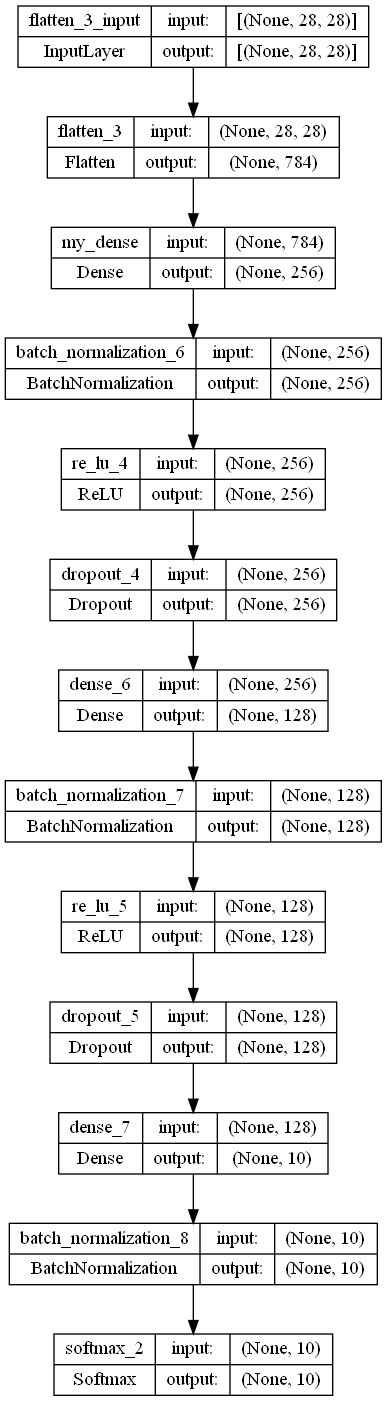

In [27]:
keras.utils.plot_model(bn_model, show_shapes=True)

In [28]:
hist = bn_model.fit(train_dataset, epochs=N_EPOCHS,
                    validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 8s 10ms/step - loss: 0.5911 - accuracy: 0.8875 - val_loss: 0.2760 - val_accuracy: 0.9584
Epoch 2/20
600/600 [==============================] - 7s 11ms/step - loss: 0.2946 - accuracy: 0.9434 - val_loss: 0.1595 - val_accuracy: 0.9659
Epoch 3/20
600/600 [==============================] - 7s 11ms/step - loss: 0.2019 - accuracy: 0.9574 - val_loss: 0.1150 - val_accuracy: 0.9732
Epoch 4/20
600/600 [==============================] - 8s 13ms/step - loss: 0.1572 - accuracy: 0.9646 - val_loss: 0.0963 - val_accuracy: 0.9760
Epoch 5/20
600/600 [==============================] - 7s 12ms/step - loss: 0.1318 - accuracy: 0.9690 - val_loss: 0.0790 - val_accuracy: 0.9782
Epoch 6/20
600/600 [==============================] - 8s 14ms/step - loss: 0.1112 - accuracy: 0.9728 - val_loss: 0.0728 - val_accuracy: 0.9789
Epoch 7/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0970 - accuracy: 0.9760 - val_loss: 0.0685 - val_accuracy: 0.9809

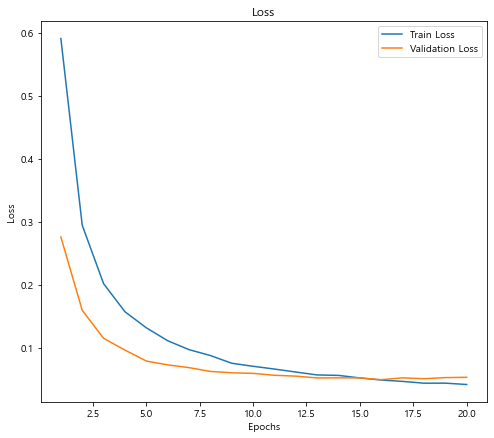

In [29]:
plot_loss(N_EPOCHS, hist)

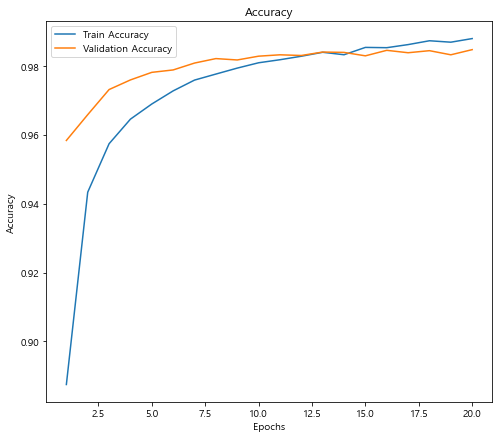

In [30]:
plot_accuracy(N_EPOCHS, hist)

## Learning Rate 조정을 이용한 성능향상

### Learning Rate Decay
- 일정한 step마다 일정비율로 Learning rate를 조정

In [31]:
def create_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [32]:
model = create_model()

In [33]:
# len(dataset객체) : epoch당 step수

len(train_dataset)*10  #10에폭의 step수

600

In [34]:
# 시작 Learning를 크게 잡아주고 갈수록  줄어들도록 규칙을 정한다. 
lr_scheduler = keras.optimizers.schedules.ExponentialDecay(
                    initial_learning_rate=LEARNING_RATE,  # 시작 Learning Rate
                    decay_steps=len(train_dataset)*5,     # 몇 step마다 변경할 것인지. (에폭단위가 아니라 step단위)
                    decay_rate=0.2,                       # 변경 비율. 현재_learning_rate * decay_rate => 새로운 learning rate
                    staircase=True,                       # 계단식변경 여부(defalt: False -> 매 스텝마다 조금씩 변경. True: 지정한 step에서 한번에 변경.)
                    )
# LearningRate Decay객체(ExponentialDecay)를 컴파일 할 때 설정하는 optimizer에 learinging_rate 매개변수에 전달.

In [35]:
#learning_rate에 LearningRate scheduler를 값(0.0001)대신 설정.
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_scheduler),  
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
hist = model.fit(train_dataset, 
                 epochs=N_EPOCHS, 
                 validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 8s 12ms/step - loss: 0.2516 - accuracy: 0.9254 - val_loss: 0.1189 - val_accuracy: 0.9621
Epoch 2/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0966 - accuracy: 0.9706 - val_loss: 0.0961 - val_accuracy: 0.9706
Epoch 3/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0638 - accuracy: 0.9797 - val_loss: 0.0781 - val_accuracy: 0.9753
Epoch 4/20
600/600 [==============================] - 7s 12ms/step - loss: 0.0467 - accuracy: 0.9853 - val_loss: 0.0742 - val_accuracy: 0.9773
Epoch 5/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0780 - val_accuracy: 0.9769
Epoch 6/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0133 - accuracy: 0.9965 - val_loss: 0.0579 - val_accuracy: 0.9822
Epoch 7/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0080 - accuracy: 0.9982 - val_loss: 0.0590 - val_accuracy: 0.9821

In [ ]:
plot_loss(N_EPOCHS, hist)

### Callback 을 이용한 학습률 조정
- ReduceLROnPlateau callback을 이용
    - 학습시 성능이 개선이 안되는 경우 LR를 조정

In [39]:
model = create_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
# ReduceLROnPlateau: 학습도중에 성능이 개선이 되지 않으면(시점) Learning Rate를 조정(처리)
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

lr_cb = ReduceLROnPlateau(monitor='val_loss',  # 어떤 성능 확인할 지 (default: val_loss)
                          factor=0.2,          # 변경비율 (현재 LR * factor => 새로운 LR)
                          patience=3,          # 성능개선이 안되는 것을 몇 epoch까지 볼것인지. 설정한 에폭 안에 성능 개선이 안되면 LR를 변경.(보통 5, 10)
                          verbose=2) # 로그(기록) 출력

In [41]:
# callback은 fit() 메소드의 callbacks 매개변수에 리스트에 담아서 전달.
hist = model.fit(train_dataset, epochs=N_EPOCHS, 
                 validation_data=test_dataset,
                 callbacks=[lr_cb])

Epoch 1/20
600/600 [==============================] - 7s 10ms/step - loss: 0.2555 - accuracy: 0.9246 - val_loss: 0.1227 - val_accuracy: 0.9624 - lr: 0.0010
Epoch 2/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0944 - accuracy: 0.9708 - val_loss: 0.0910 - val_accuracy: 0.9700 - lr: 0.0010
Epoch 3/20
600/600 [==============================] - 7s 12ms/step - loss: 0.0636 - accuracy: 0.9801 - val_loss: 0.0814 - val_accuracy: 0.9744 - lr: 0.0010
Epoch 4/20
600/600 [==============================] - 7s 12ms/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.0670 - val_accuracy: 0.9802 - lr: 0.0010
Epoch 5/20
600/600 [==============================] - 10s 16ms/step - loss: 0.0356 - accuracy: 0.9882 - val_loss: 0.0678 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 6/20
600/600 [==============================] - 8s 13ms/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.0756 - val_accuracy: 0.9797 - lr: 0.0010
Epoch 7/20
596/600 [============================>.] - ETA: 0s -